### **1. Import libraries and dataset**

In [13]:
import numpy as np ## pip install numpy==2.1 #need this to run ydata-profiling
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency # filter method
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport 
import matplotlib.pyplot as plt
from pathlib import Path

import sys
#!{sys.executable} -m pip install -U ydata-profiling[notebook]
#!pip install jupyter-contrib-nbextensions
#!jupyter nbextension enable --py widgetsnbextension

In [14]:
#import sys
#sys.path.append('..')

# Get the path of this notebook
base_path = Path.cwd()

# Build the path to the dataset relative to the project structure
data_path = base_path / "data" / "processed" / "HR_1_1.csv"

# Load the original file
HR_1_1 = pd.read_csv(base_path / "data" / "processed" / "HR_1_1.csv")


## **2. Multivariate data analysis**

The purpose of this section is to analyze potential correlations among the various variables in the dataset as a form of filter **Feature Selection**.

**Numerical features** were scaled using `MinMaxScaler()`. **Categorical features** were **encoded** and converted into numerical representations so that machine learning algorithms can process and interpret them effectively.

### **2.1. Spearman correlation analysis**

Spearman is useful to understand if there are redundant features with high correlation to disconsider. It is suitable for continuous and ordinal data.

In [15]:
correlation_HR_1_1 = HR_1_1.corr(method='spearman', numeric_only=True)
correlation_HR_1_1

,EmployeeNumber,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,1.000000,-0.001770,-0.010369,-0.051800,0.038906,0.042815,0.021750,0.034717,-0.002453,-0.011057,...,-0.014098,-0.018322,0.023770,0.006831,-0.008074,-0.008106,0.022075,0.053846,-0.035480,-0.024250
Age,-0.001770,1.000000,-0.171214,0.007290,-0.019291,0.204937,0.009820,0.028858,0.034456,0.489618,...,0.184877,-0.152827,-0.001102,-0.174193,-0.021040,0.018513,-0.036088,0.077494,-0.113026,0.027044
Attrition,-0.010369,-0.171214,1.000000,-0.056970,0.079248,-0.030346,-0.096486,-0.006692,-0.119496,-0.190370,...,-0.088870,-0.000360,0.019774,0.157234,0.115143,-0.049538,0.029453,-0.090984,0.175419,0.246118
DailyRate,-0.051800,0.007290,-0.056970,1.000000,-0.002754,-0.013607,0.018961,0.023511,0.042469,0.003816,...,0.000897,-0.002829,-0.000181,0.005845,-0.012103,0.002207,-0.011415,0.040180,-0.076012,0.008383
DistanceFromHome,0.038906,-0.019291,0.079248,-0.002754,1.000000,0.015708,-0.010401,0.020446,0.034430,0.022148,...,-0.018166,-0.016738,0.044678,-0.005625,-0.008361,-0.004095,0.004387,0.017019,-0.026259,0.036639
Education,0.042815,0.204937,-0.030346,-0.013607,0.015708,1.000000,-0.027625,0.014432,0.037231,0.107419,...,0.046079,0.004425,0.051082,-0.083289,-0.006252,0.002990,-0.009903,-0.001209,0.006131,-0.017003
EnvironmentSatisfaction,0.021750,0.009820,-0.096486,0.018961,-0.010401,-0.027625,1.000000,-0.052380,-0.015301,-0.000192,...,-0.046003,0.003960,-0.024693,-0.001975,-0.010527,0.007131,0.001863,-0.028464,0.013736,0.067670
HourlyRate,0.034717,0.028858,-0.006692,0.023511,0.020446,0.014432,-0.052380,1.000000,0.043884,-0.033876,...,-0.025475,0.019262,-0.012116,-0.018345,-0.019292,0.028003,-0.000278,0.035371,-0.032502,-0.009140
JobInvolvement,-0.002453,0.034456,-0.119496,0.042469,0.034430,0.037231,-0.015301,0.043884,1.000000,-0.018424,...,0.016192,0.044358,-0.010484,-0.022248,0.006497,0.019436,0.022468,0.022918,-0.046740,-0.001866
JobLevel,-0.011057,0.489618,-0.190370,0.003816,0.022148,0.107419,-0.000192,-0.033876,-0.018424,1.000000,...,0.348861,-0.439853,0.251200,-0.254342,-0.016058,0.008832,-0.050875,0.050213,-0.090430,-0.000394


In [16]:
sorted_columns = sorted(correlation_HR_1_1.columns)
correlation_HR_1_1_sorted = correlation_HR_1_1.loc[sorted_columns, sorted_columns]

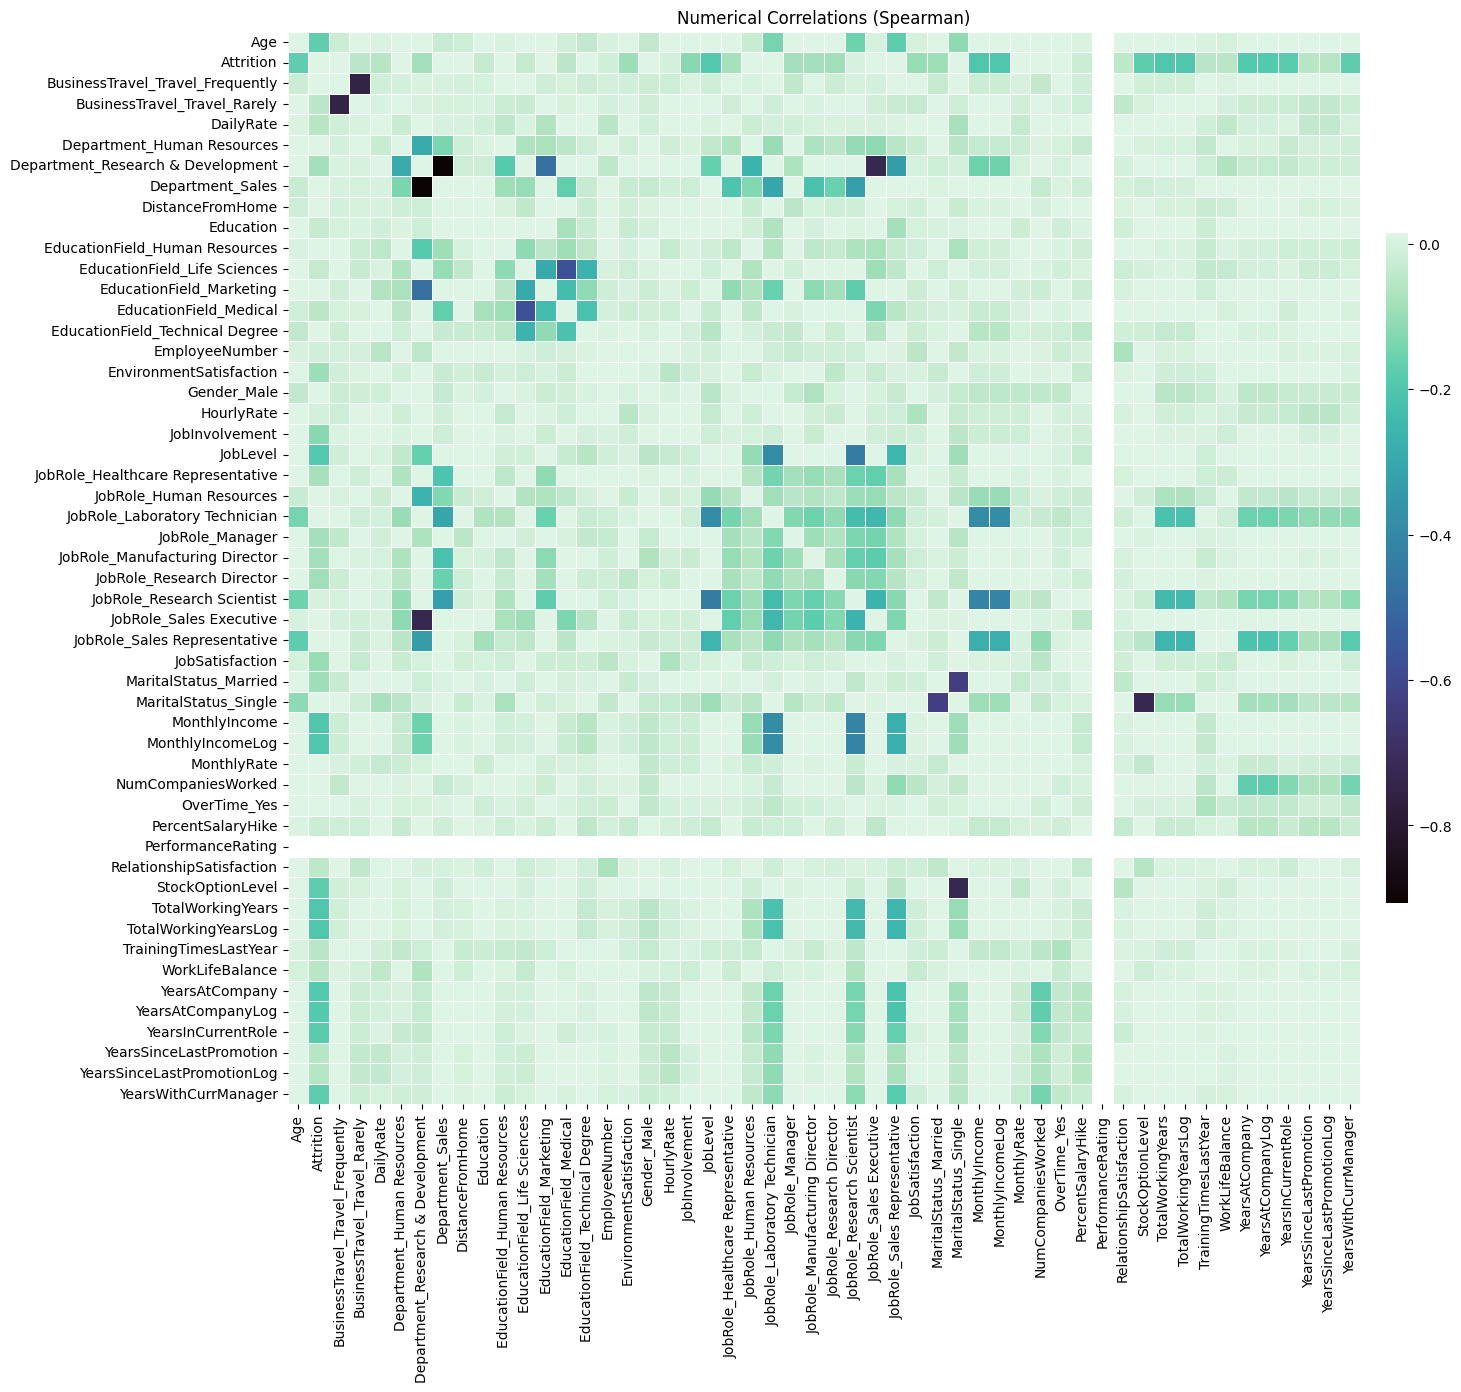

In [17]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_HR_1_1_sorted, vmax=0.015, cmap="mako", square=True, linewidths=0.5, annot=False, cbar_kws={
        'shrink': 0.6,      # Makes colorbar smaller (60% of default)
        'aspect': 30,        # Makes colorbar narrower
        'pad': 0.02          # Adds space between plot and colorbar
    })
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

**Highlights of features and target category:**

The image above allows to conclude that aren't strong correlations between the features and the target variable (Attrition). However, some points to hightlight 

- **Attrition and Age:** the spearman correlation coefficient is -0.171214, which is a negative relationship. This can be interpreted as the age increases the attrition score decreases, so <u>older employees are less likely to leave the company</u>. However, the score is low so the variable by itself doesn't explain the attrition. 

- **Attrition and Job Level:** the spearman correlation coefficient is -0.190370, also a negative relationship. The job level variable represents the hierarchy at the company and this suggests that <u> as the level is higher, the attrition score decreases</u>.

- **Attrition and Monthly Income:** the spearman correlation coefficient is -0.199086, also a negative relationship. As the monthly income increases the attrition score tends to be lower, indicating that <u>higher incomes are associated with a lower rate of employee turnover</u>.

- **Attrition and Total Working Years:** the spearman correlation coefficient is -0.199320, which indicates that <u>more years working represents a decrease in the attrition score</u>. It corroborates the age seen previously, although it is interesting that the age itself doesn't have a strong correlation with the total working years.

- **Attrition and Years at the Company:** the spearman correlation coefficient is -0.191121, which indicates a <u>lower score of attrition when the employee has more years of work in the company</u>.

- **Attrition and Years in the Current Role:** the spearman correlation coefficient is -0.180566, indicates that <u>more years in the current rule are slightly related with lower attrition score</u>.

- **Attrition and Years with the Current Manager:** the spearman correlation coefficient is -0.175355, indicates that <u>more years with the current manager represents a lower attrition score</u>.

**Highlights of other feature relations:**

The strongest correlation coefficients -  the darkest spots were observed among the dummy variables for features like Department, Gender, and Marital Status due to the structural artifacts of the data encoding process, not signals of real-world predictive power. 

These strong relationships, particularly the high negative ones, result from multicollinearity. When a categorical feature with $N$ options is converted into $N$ binary dummy columns (e.g., Gender_Male and Gender_Female), the columns are perfectly or near-perfectly dependent: if one is '1' (True), the other(s) must be '0' (False). 

For instance, the perfect negative correlation of $-1.0$ between Gender_Male and Gender_Female simply confirms that a person cannot be both simultaneously. 

While mathematically sound, these high correlations are uninformative for predicting Attrition and would be ignored when assessing external factors influencing employee turnover.

The focus must remain on the weaker, yet meaningful, correlations found between the demographic/satisfaction variables and the target variable, Attrition.

## **3. Feature Engineering**

- **Attrition and Age:** the spearman correlation coefficient is -0.171214, which is a negative relationship. This can be interpreted as the age increases the attrition score decreases, so <u>older employees are less likely to leave the company</u>. However, the score is low so the variable by itself doesn't explain the attrition. 

- **Attrition and Job Level:** the spearman correlation coefficient is -0.190370, also a negative relationship. The job level variable represents the hierarchy at the company and this suggests that <u> as the level is higher, the attrition score decreases</u>.

- **Attrition and Montly Income:** the spearman correlation coefficient is -0.199086, also a negative relationship. As the monthly income increases the attrition score tends to be lower, indicating that <u>higher incomes are associated with a lower rate of employee turnover</u>.

- **Attrition and Total Working Years:** the spearman correlation coefficient is -0.199320, which indicates that <u>more years working represents a decrease in the attrition score</u>. It corroborates the age seen previously, although it is interesting that the age itself doesn't have a strong correlation with the total working years.

- **Attrition and Years at the Company:** the spearman correlation coefficient is -0.191121, which indicates a <u>lower score of attrition when the employee has more years of work in the company</u>.

- **Attrition and Years in the Current Rule:** the spearman correlation coefficient is -0.180566, indicates that <u>more years in the current rule are slightly related with lower attrition score</u>.

- **Attrition and Years with the Current Manager:** the spearman correlation coefficient is -0.175355, indicates that <u>more years with the current manager represents a lower attrition score</u>.

Analyse if big differences between monthly rates and montly income may influence the target variable.

In [18]:
rate_income = HR_1_1['MonthlyRate'] - HR_1_1['MonthlyIncome']
HR_1_1['rate_income'] = rate_income
print(HR_1_1['rate_income'])


0       13486
1       19777
2         306
3       20250
4       13164
        ...  
1465     9719
1466    11466
1467     -968
1468     7853
1469     5824
Name: rate_income, Length: 1470, dtype: int64


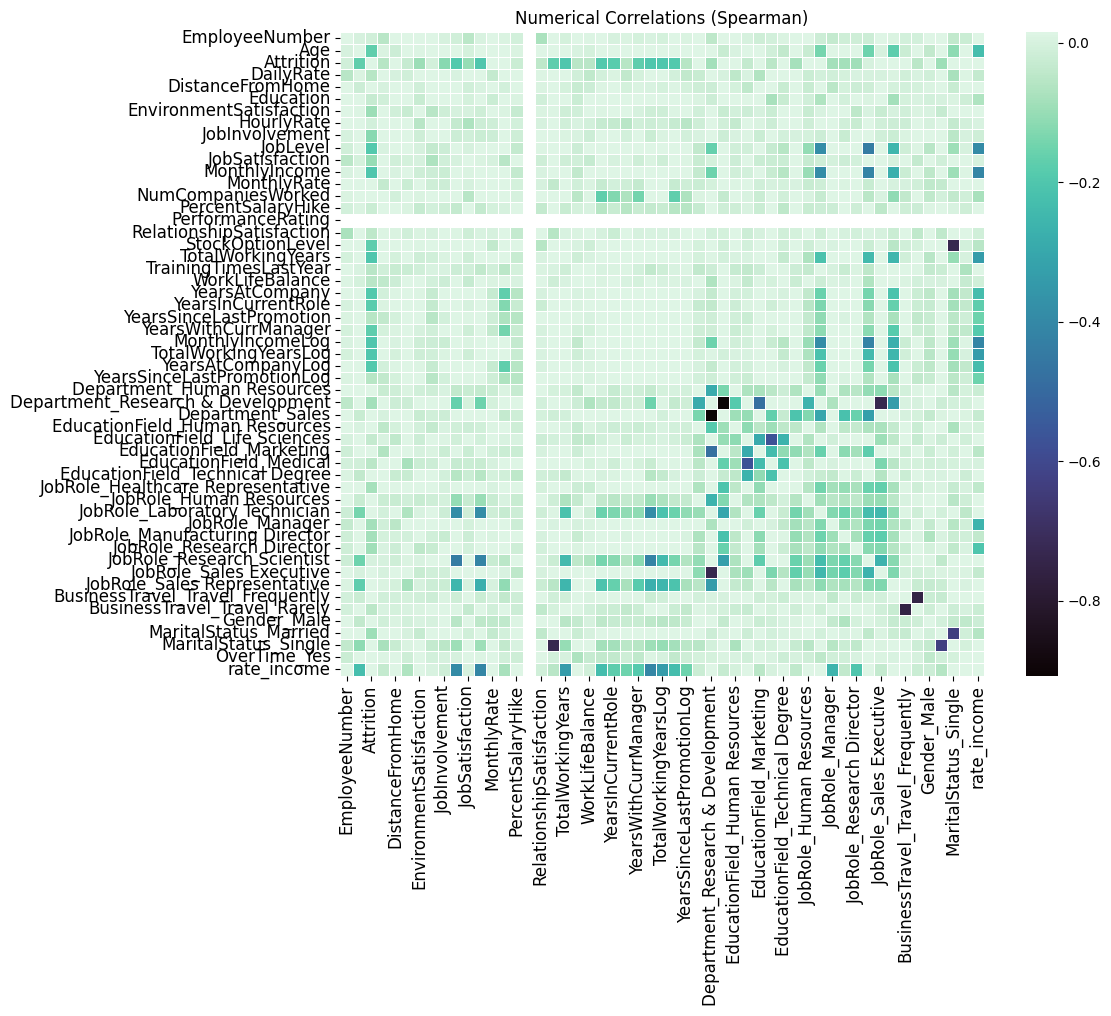

In [19]:
correlation1 = HR_1_1.corr(method='spearman', numeric_only=True)

numeric_cols = HR_1_1.select_dtypes(include=['number']).columns

#scaler = MinMaxScaler()
#correlation1[numeric_cols] = scaler.fit_transform(correlation1[numeric_cols])

plt.figure(figsize=(12, 10))
sns.heatmap(correlation1, vmax=0.015, cmap="mako", square=True, linewidths=0.5, annot=False)
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import pointbiserialr

# Encode Attrition as binary (Yes -> 1, No -> 0)
HR_1_1['Attrition_binary'] = HR_1_1['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate point biserial correlation
correlation, p_value = pointbiserialr(HR_1_1['rate_income'], HR_1_1['Attrition_binary'])

print(f"Point Biserial Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

Point Biserial Correlation: nan
P-value: nan


In [21]:
rate_income.head()

0    13486
1    19777
2      306
3    20250
4    13164
dtype: int64

## **6. Feature Selection**

### **6.1. Approach 1**

Use the variables studied on the  4.3. spearman correlation analysis

In [22]:
correlation_HR_1_1_sorted

,Age,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,DailyRate,Department_Human Resources,Department_Research & Development,Department_Sales,DistanceFromHome,Education,...,TotalWorkingYears,TotalWorkingYearsLog,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsAtCompanyLog,YearsInCurrentRole,YearsSinceLastPromotion,YearsSinceLastPromotionLog,YearsWithCurrManager
Age,1.000000,-0.171214,-0.021040,0.018513,0.007290,0.020814,0.018278,-0.028086,-0.019291,0.204937,...,0.656802,0.656802,0.001396,-0.003707,0.250337,0.250337,0.197952,0.171492,0.171492,0.194821
Attrition,-0.171214,1.000000,0.115143,-0.049538,-0.056970,0.016832,-0.085293,0.080855,0.079248,-0.030346,...,-0.199320,-0.199320,-0.051347,-0.051951,-0.191121,-0.191121,-0.180566,-0.053762,-0.053762,-0.175355
BusinessTravel_Travel_Frequently,-0.021040,0.115143,1.000000,-0.753092,-0.012103,-0.007485,0.003340,-0.000160,-0.008361,-0.006252,...,-0.011014,-0.011014,0.011582,0.007543,0.017300,0.017300,0.016146,0.035392,0.035392,0.012914
BusinessTravel_Travel_Rarely,0.018513,-0.049538,-0.753092,1.000000,0.002207,0.009618,0.000465,-0.004718,-0.004095,0.002990,...,0.023961,0.023961,0.010540,-0.009466,-0.022730,-0.022730,-0.024599,-0.037283,-0.037283,-0.023301
DailyRate,0.007290,-0.056970,-0.012103,0.002207,1.000000,-0.027101,0.014350,-0.002912,-0.002754,-0.013607,...,0.021733,0.021733,-0.012206,-0.040352,-0.009335,-0.009335,0.007281,-0.037863,-0.037863,-0.004716
Department_Human Resources,0.020814,0.016832,-0.007485,0.009618,-0.027101,1.000000,-0.290754,-0.139650,-0.017161,0.006396,...,-0.006498,-0.006498,-0.036966,0.055457,-0.000763,-0.000763,-0.029643,-0.007159,-0.007159,-0.014794
Department_Research & Development,0.018278,-0.085293,0.003340,0.000465,0.014350,-0.290754,1.000000,-0.906818,-0.019487,-0.017674,...,0.009327,0.009327,-0.019138,-0.067055,-0.035285,-0.035285,-0.037378,-0.015640,-0.015640,-0.014655
Department_Sales,-0.028086,0.080855,-0.000160,-0.004718,-0.002912,-0.139650,-0.906818,1.000000,0.027727,0.015473,...,-0.006790,-0.006790,0.036092,0.044964,0.036853,0.036853,0.051742,0.019340,0.019340,0.021685
DistanceFromHome,-0.019291,0.079248,-0.008361,-0.004095,-0.002754,-0.017161,-0.019487,0.027727,1.000000,0.015708,...,-0.003065,-0.003065,-0.025876,-0.020402,0.011119,0.011119,0.013732,-0.005071,-0.005071,0.004422
Education,0.204937,-0.030346,-0.006252,0.002990,-0.013607,0.006396,-0.017674,0.015473,0.015708,1.000000,...,0.161789,0.161789,-0.022948,0.017350,0.063552,0.063552,0.054589,0.032035,0.032035,0.051270


- Age (-0.17) is highly overall correlated with **TotalWorkingYears** (-0.20)
- Department (0.08) is highly overall correlated with EducationField (0.07) and JobRole (0.16)
- EducationField (0.07) is highly overall correlated with Department (0.08)
- JobLevel (-0.19) is highly overall correlated with JobRole (0.16),  MonthlyIncome (0.015), and **TotalWorkingYears (-0.20)**
- JobRole (0.16) is highly overall correlated with Department (0.08) and JobLevel (-0.19)
- **MaritalStatus (0.18)** is highly overall correlated with StockOptionLevel (-0.17)
- MonthlyIncome (0.015) is highly overall correlated with JobLevel (-0.19) and **TotalWorkingYears** (-0.20)
- **PercentSalaryHike (-0.02)** is highly overall correlated with PerformanceRating (---)
- PerformanceRating (---) is highly overall correlated with PercentSalaryHike (-0.02)
- StockOptionLevel (-0.17) is highly overall correlated with **MaritalStatus** (0.18)
- **TotalWorkingYears (-0.20)** is highly overall correlated with Age (-0.17), JobLevel (-0.19), YearsAtCompany (-0.19) and MonthlyIncome (0.015)
- YearsAtCompany (-0.19) is highly overall correlated with **TotalWorkingYears (-0.20)**, YearsInCurrentRole (-0.18), YearsSinceLastPromotion (-0.05), YearsWithCurrManager (-0.18) 
- YearsInCurrentRole (-0.18) is highly overall correlated with **YearsAtCompany (-0.19)**, YearsSinceLastPromotion (-0.05), YearsWithCurrManager (-0.18)
- YearsSinceLastPromotion (-0.05) is highly overall correlated with YearsAtCompany (-0.19) and YearsInCurrentRole (-0.18)
- YearsWithCurrManager (-0.18) is highly overall correlated with YearsAtCompany (-0.19) and YearsInCurrentRole (-0.18)

**If two variables are correlated, we drop one of them, keeping the variable with largest correlation with the target**

Remove:
- Age
- Department
- EducationField
- JobLevel
- JobRole
- StockOptionLevel
- MonthlyIncome
- PerformanceRating
- YearsInCurrentRole

Keep:
- TotalWorkingYears
- MaritalStatus
- PercentSalaryHike
- YearsAtCompany

In [23]:
# If two variables are correlated, we drop one of them, keeping the variable with largest correlation with the target

# Compute correlation matrix
corr_matrix = HR_1_1.corr().abs()

# Target variable correlation
target = 'Attrition'
target_corr = corr_matrix[target].drop(target)  # drop self-correlation

# Correlation threshold
threshold = 0.65

# Initialize set for dropped columns
drop_cols = set()

# Iterate over the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    col1 = corr_matrix.columns[i]
    if col1 == target or col1 in drop_cols:
        continue

    for j in range(i + 1, len(corr_matrix.columns)):
        col2 = corr_matrix.columns[j]
        if col2 == target or col2 in drop_cols:
            continue

        # Check correlation between two features
        if corr_matrix.iloc[i, j] > threshold:
            # Compare correlation with target
            corr1 = target_corr.get(col1, 0)
            corr2 = target_corr.get(col2, 0)

            # Drop the one with smaller correlation to target
            if corr1 >= corr2:
                drop_cols.add(col2)
            else:
                drop_cols.add(col1)

print("Columns to drop due to high correlation:", drop_cols)
print("Number of columns to drop:", len(drop_cols))

# Create final dataset
HR_final = HR_1_1.drop(columns=list(drop_cols))
print("Final dataset shape:", HR_final.shape)
HR_final.head()


Columns to drop due to high correlation: {'Age', 'StockOptionLevel', 'YearsAtCompany', 'YearsSinceLastPromotion', 'Department_Human Resources', 'JobRole_Sales Executive', 'MonthlyIncomeLog', 'TotalWorkingYears', 'YearsWithCurrManager', 'Department_Sales', 'MonthlyIncome', 'BusinessTravel_Travel_Rarely', 'YearsInCurrentRole', 'MonthlyRate', 'JobLevel'}
Number of columns to drop: 15
Final dataset shape: (1470, 39)


,EmployeeNumber,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,NumCompaniesWorked,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,rate_income,Attrition_binary
0,1,1,1102,1,2,2,94,3,4,8.0,...,False,False,False,False,False,False,True,True,13486,NaN
1,2,0,279,8,1,3,61,2,2,1.0,...,False,True,False,True,True,True,False,False,19777,NaN
2,4,1,1373,2,2,4,92,2,3,6.0,...,False,False,False,False,True,False,True,True,306,NaN
3,5,0,1392,3,4,4,56,3,3,1.0,...,False,True,False,True,False,True,False,True,20250,NaN
4,7,0,591,2,1,1,40,3,2,8.5,...,False,False,False,False,True,True,False,False,13164,NaN


In [24]:
print("Kept columns:", [c for c in HR_final.columns if c not in drop_cols])


Kept columns: ['EmployeeNumber', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'TotalWorkingYearsLog', 'YearsAtCompanyLog', 'YearsSinceLastPromotionLog', 'Department_Research & Development', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes', 'rate_income', 'Attrition_binary']


## **7. Applying StratifiedKFold**

In [25]:
from sklearn.model_selection import StratifiedKFold

def select_best_cat_features(X, y, columns, n_splits=5, alpha=0.05):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    categorical_cols = columns

    significance_counts = {col: 0 for col in categorical_cols}

    for count, (train_index, val_index) in enumerate(skf.split(X, y), start=1):
        print(f'\n{"_"*40}\nSPLIT {count}\n')

        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_cat = X_train[categorical_cols]

        for col in X_cat.columns:
            contingency = pd.crosstab(X_cat[col], y_train)
            _, p, _, _ = chi2_contingency(contingency)
            if p < alpha:
                print(f"{col}: SIGNIFICANT (p={p:.4f})")
                significance_counts[col] += 1
            else:
                print(f"{col}: NOT significant (p={p:.4f})")

    print("\nSummary of significance across splits:")
    summary = pd.DataFrame.from_dict(significance_counts, orient='index', columns=['Significant_Splits'])
    summary['% Splits Significant'] = (summary['Significant_Splits'] / n_splits) * 100
    return summary.sort_values(by='Significant_Splits', ascending=False)

In [27]:
y = HR_1_1['Attrition'].copy()
X = HR_1_1.drop(columns=['Attrition']).copy()

# Select categorical and binary-like columns
columns = X.columns.tolist()

# Run Chi-Squared feature selection
result_df = select_best_cat_features(X, y, columns=columns)
print(result_df)


________________________________________
SPLIT 1

EmployeeNumber: NOT significant (p=0.4863)
Age: SIGNIFICANT (p=0.0000)
DailyRate: NOT significant (p=0.3521)
DistanceFromHome: SIGNIFICANT (p=0.0050)
Education: NOT significant (p=0.5352)
EnvironmentSatisfaction: SIGNIFICANT (p=0.0001)
HourlyRate: NOT significant (p=0.4920)
JobInvolvement: SIGNIFICANT (p=0.0000)
JobLevel: SIGNIFICANT (p=0.0000)
JobSatisfaction: SIGNIFICANT (p=0.0005)
MonthlyIncome: NOT significant (p=0.1387)
MonthlyRate: NOT significant (p=0.6817)
NumCompaniesWorked: NOT significant (p=0.0634)
PercentSalaryHike: NOT significant (p=0.6038)
PerformanceRating: NOT significant (p=1.0000)
RelationshipSatisfaction: NOT significant (p=0.3048)
StockOptionLevel: SIGNIFICANT (p=0.0000)
TotalWorkingYears: SIGNIFICANT (p=0.0000)
TrainingTimesLastYear: SIGNIFICANT (p=0.0076)
WorkLifeBalance: SIGNIFICANT (p=0.0091)
YearsAtCompany: SIGNIFICANT (p=0.0000)
YearsInCurrentRole: SIGNIFICANT (p=0.0000)
YearsSinceLastPromotion: NOT signific

ValueError: No data; `observed` has size 0.

In [ ]:
best_predictors = result_df[result_df['% Splits Significant'] >= 80].index.tolist()
print("Best predictors (significant in at least 80% of splits):", best_predictors)

Best predictors (significant in at least 60% of splits): ['JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction', 'JobRole_Research Director', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'WorkLifeBalance', 'Department_Research & Development', 'YearsAtCompanyLog', 'TotalWorkingYearsLog', 'MaritalStatus_Single', 'OverTime_Yes', 'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director', 'MaritalStatus_Married', 'JobRole_Manager', 'NumCompaniesWorked', 'JobRole_Healthcare Representative']


In [ ]:
# Create best dataframe
HR_best = HR_final[best_predictors + ['Attrition']].copy()
#sorted_best_columns = sorted(HR_best.columns)
#HR_best_sorted = HR_best.loc[sorted_best_columns, sorted_best_columns]
HR_best.head()

,JobSatisfaction,JobInvolvement,EnvironmentSatisfaction,JobRole_Research Director,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,WorkLifeBalance,Department_Research & Development,YearsAtCompanyLog,TotalWorkingYearsLog,MaritalStatus_Single,OverTime_Yes,JobRole_Laboratory Technician,JobRole_Manufacturing Director,MaritalStatus_Married,JobRole_Manager,NumCompaniesWorked,JobRole_Healthcare Representative,Attrition
EmployeeNumber,,,,,,,,,,,,,,,,,,,
1,1.000000,0.666667,0.333333,False,False,False,0.000000,False,0.660876,0.649223,True,True,False,False,False,False,0.941176,False,1
2,0.333333,0.333333,0.666667,False,False,True,0.666667,True,0.814381,0.708516,False,False,False,False,True,False,0.117647,False,0
4,0.666667,0.333333,1.000000,False,False,False,0.666667,True,0.000000,0.614421,True,True,True,False,False,False,0.705882,False,1
5,0.666667,0.666667,1.000000,False,False,True,0.666667,True,0.746229,0.649223,False,True,False,False,True,False,0.117647,False,0
7,0.333333,0.666667,0.000000,False,False,False,0.666667,True,0.373114,0.574966,False,False,True,False,True,False,1.000000,False,0


### First insights
The variables: 
- JobSatisfaction 
- JobInvolvement
- EnvironmentSatisfaction
- JobRole
- BusinessTravel
- WorkLifeBalance
- Department
- YearsAtCompany
- TotalWorkingHours
- MaritalStatus
- OverTime  

all seem relevant to predict if a person will leave the company or not.

In [ ]:

correlation_HR_best = HR_best.corr(method='spearman', numeric_only=True)
correlation_HR_best

,JobSatisfaction,JobInvolvement,EnvironmentSatisfaction,JobRole_Research Director,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,WorkLifeBalance,Department_Research & Development,YearsAtCompanyLog,TotalWorkingYearsLog,MaritalStatus_Single,OverTime_Yes,JobRole_Laboratory Technician,JobRole_Manufacturing Director,MaritalStatus_Married,JobRole_Manager,NumCompaniesWorked,JobRole_Healthcare Representative,Attrition
JobSatisfaction,1.000000,-0.012148,-0.002993,-0.008418,-0.002888,0.027756,-0.029781,-0.003489,0.012184,-0.015670,0.026268,0.028522,-0.013939,-0.018089,-0.013665,-0.004322,-0.051516,0.017141,-0.102948
JobInvolvement,-0.012148,1.000000,-0.015301,0.016192,-0.022248,0.006497,-0.019889,0.019049,0.014365,0.006232,-0.046740,-0.001866,-0.019011,-0.024833,0.022918,0.016936,0.015448,-0.001826,-0.119496
EnvironmentSatisfaction,-0.002993,-0.015301,1.000000,-0.046003,-0.001975,-0.010527,0.027169,0.031796,0.008352,-0.014143,0.013736,0.067670,0.000764,0.059655,-0.028464,0.011842,0.006151,0.011491,-0.096486
JobRole_Research Director,-0.008418,0.016192,-0.046003,1.000000,-0.058687,-0.023579,0.036570,0.174596,0.123285,0.272862,-0.042299,0.002400,-0.110947,-0.079362,0.008271,-0.065508,0.101980,-0.075038,-0.088870
JobRole_Sales Representative,-0.002888,-0.022248,-0.001975,-0.058687,1.000000,0.055469,0.041596,-0.336127,-0.208338,-0.253047,0.072439,0.003347,-0.113130,-0.080924,-0.023659,-0.066797,-0.109280,-0.076515,0.157234
BusinessTravel_Travel_Frequently,0.027756,0.006497,-0.010527,-0.023579,0.055469,1.000000,0.007543,0.003340,0.017300,-0.011014,0.027734,0.029392,0.010023,0.009783,-0.030785,-0.042583,-0.037103,0.008029,0.115143
WorkLifeBalance,-0.029781,-0.019889,0.027169,0.036570,0.041596,0.007543,1.000000,-0.067055,0.005131,0.002816,0.017018,-0.030171,-0.020796,0.000782,-0.000520,0.006422,0.009103,-0.021639,-0.051951
Department_Research & Development,-0.003489,0.019049,0.031796,0.174596,-0.336127,0.003340,-0.067055,1.000000,-0.035285,0.009327,-0.009990,-0.003036,0.336570,0.240754,-0.019997,-0.071356,0.029496,0.227637,-0.085293
YearsAtCompanyLog,0.012184,0.014365,0.008352,0.123285,-0.208338,0.017300,0.005131,-0.035285,1.000000,0.593126,-0.084038,-0.036942,-0.154295,0.073392,0.057679,0.198098,-0.170138,0.083753,-0.191121
TotalWorkingYearsLog,-0.015670,0.006232,-0.014143,0.272862,-0.253047,-0.011014,0.002816,0.009327,0.593126,1.000000,-0.100570,0.000405,-0.214897,0.090741,0.054131,0.371603,0.315512,0.155765,-0.199320


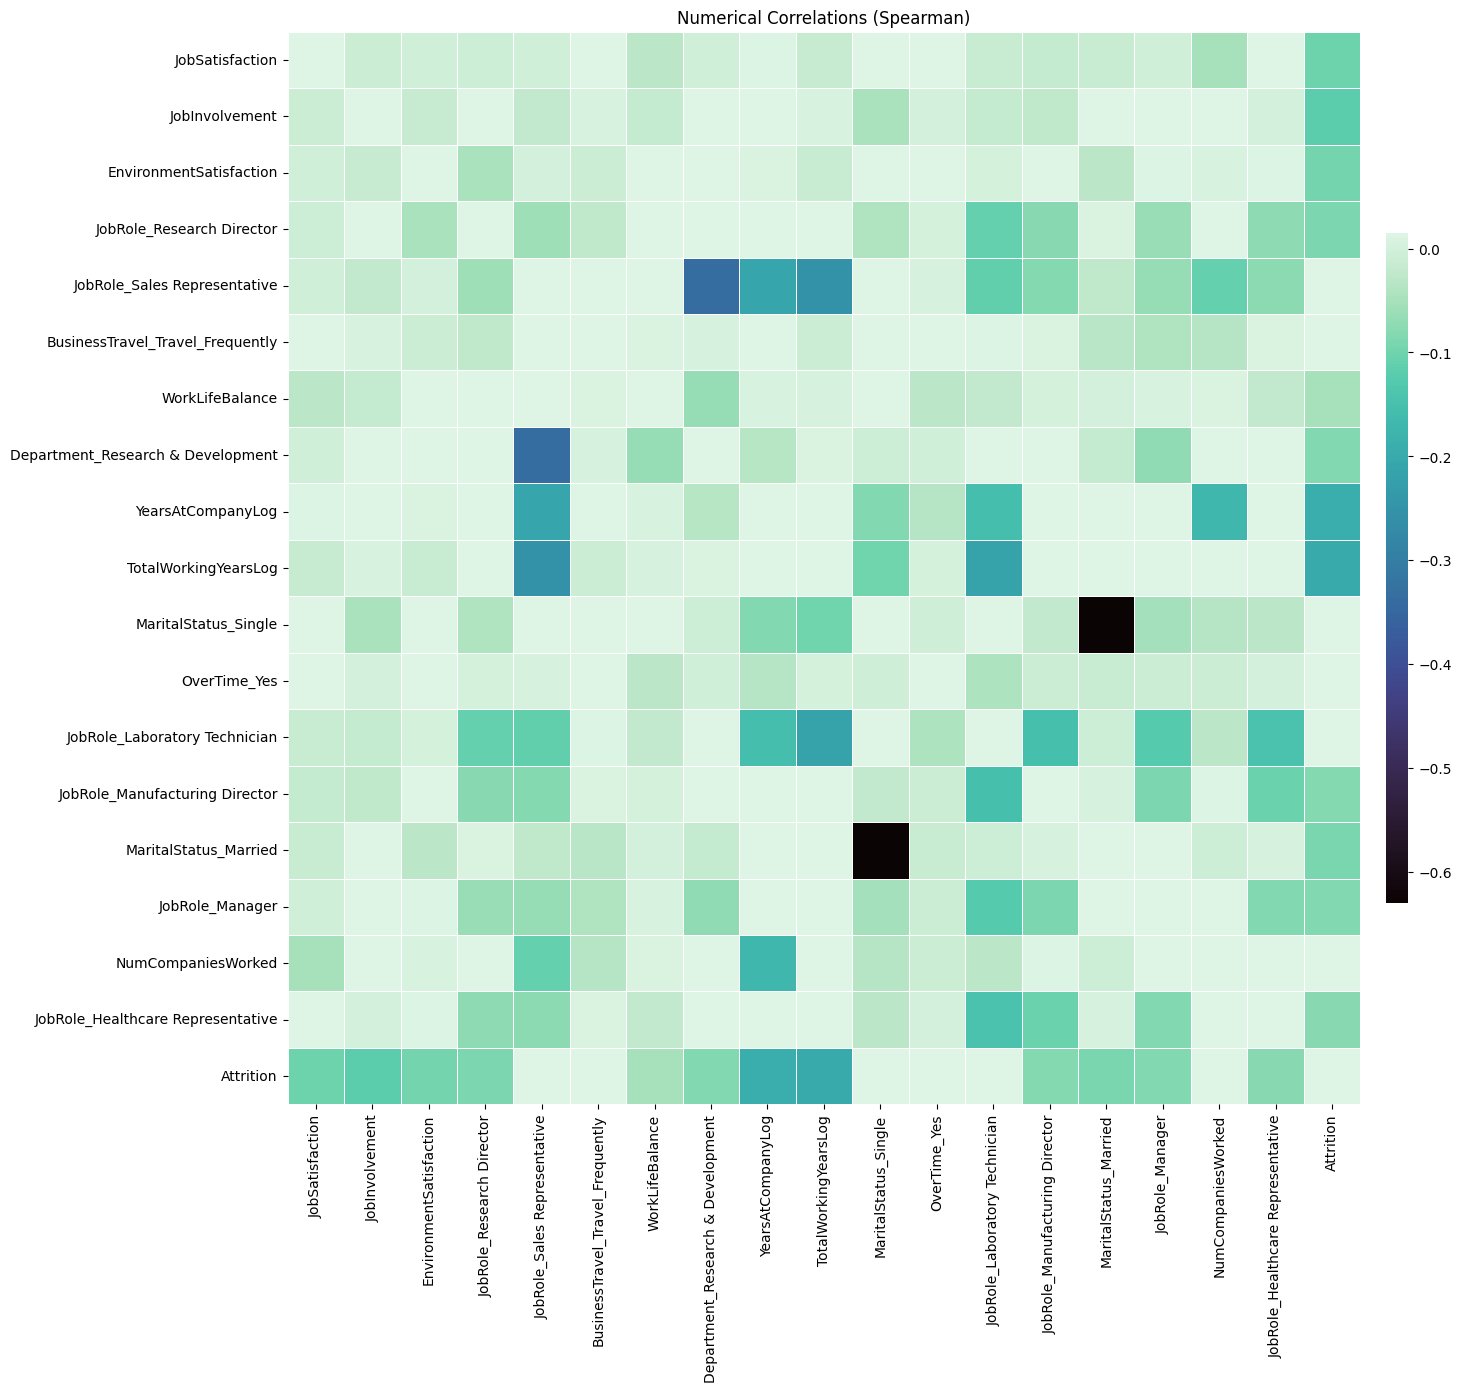

In [ ]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_HR_best, vmax=0.015, cmap="mako", square=True, linewidths=0.5, annot=False, cbar_kws={
        'shrink': 0.6,      # Makes colorbar smaller (60% of default)
        'aspect': 30,        # Makes colorbar narrower
        'pad': 0.02          # Adds space between plot and colorbar
    })
plt.title("Numerical Correlations (Spearman)")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Now there are no more correlations > 0.65 (the cut-off utilised before).

Single and Married should both stay because, although they are mildly correlated, they are both involved in predicting the target and there is a Divorced class that can be inferred from the values of both columns.

In [ ]:
# Create new variables based on domain knowledge
#HR_best['Income_per_YearAtCompany'] = HR_best['MonthlyIncomeLog'] / (HR_best['YearsAtCompanyLog'] + 1) # unfortunately MonthlyIncomeLog was dropped
HR_best['WorkLifeBalance_OverTime'] = HR_best['WorkLifeBalance'] - HR_best['OverTime_Yes'] # -> -0.23 correlation
HR_best['Job_happiness_score'] = HR_best['JobInvolvement'] + HR_best['JobSatisfaction'] + HR_best['YearsAtCompanyLog'] + HR_best['EnvironmentSatisfaction'] + HR_best['WorkLifeBalance'] - HR_best['OverTime_Yes'] #-> -0.33 correlation
# HR_best['Job_happiness_score_test'] = (HR_best['JobInvolvement'] * HR_best['JobSatisfaction'] * HR_best['YearsAtCompanyLog'] * HR_best['EnvironmentSatisfaction'] * HR_best['WorkLifeBalance']) / (HR_best['OverTime_Yes']+1) -> -0.20 correlation
HR_best.head()

,JobSatisfaction,JobInvolvement,EnvironmentSatisfaction,JobRole_Research Director,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,WorkLifeBalance,Department_Research & Development,YearsAtCompanyLog,TotalWorkingYearsLog,MaritalStatus_Single,OverTime_Yes,JobRole_Laboratory Technician,JobRole_Manufacturing Director,MaritalStatus_Married,JobRole_Manager,NumCompaniesWorked,JobRole_Healthcare Representative,Attrition,WorkLifeBalance_OverTime,Job_happiness_score
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.666667,0.333333,False,False,False,0.000000,False,0.660876,0.649223,True,True,False,False,False,False,0.941176,False,1,-1.000000,1.660876
2,0.333333,0.333333,0.666667,False,False,True,0.666667,True,0.814381,0.708516,False,False,False,False,True,False,0.117647,False,0,0.666667,2.814381
4,0.666667,0.333333,1.000000,False,False,False,0.666667,True,0.000000,0.614421,True,True,True,False,False,False,0.705882,False,1,-0.333333,1.666667
5,0.666667,0.666667,1.000000,False,False,True,0.666667,True,0.746229,0.649223,False,True,False,False,True,False,0.117647,False,0,-0.333333,2.746229
7,0.333333,0.666667,0.000000,False,False,False,0.666667,True,0.373114,0.574966,False,False,True,False,True,False,1.000000,False,0,0.666667,2.039781


In [ ]:
correlation_HR_best = HR_best.corr(method='spearman', numeric_only=True)
correlation_HR_best

,JobSatisfaction,JobInvolvement,EnvironmentSatisfaction,JobRole_Research Director,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,WorkLifeBalance,Department_Research & Development,YearsAtCompanyLog,TotalWorkingYearsLog,MaritalStatus_Single,OverTime_Yes,JobRole_Laboratory Technician,JobRole_Manufacturing Director,MaritalStatus_Married,JobRole_Manager,NumCompaniesWorked,JobRole_Healthcare Representative,Attrition,WorkLifeBalance_OverTime,Job_happiness_score
JobSatisfaction,1.000000,-0.012148,-0.002993,-0.008418,-0.002888,0.027756,-0.029781,-0.003489,0.012184,-0.015670,0.026268,0.028522,-0.013939,-0.018089,-0.013665,-0.004322,-0.051516,0.017141,-0.102948,-0.031044,0.427988
JobInvolvement,-0.012148,1.000000,-0.015301,0.016192,-0.022248,0.006497,-0.019889,0.019049,0.014365,0.006232,-0.046740,-0.001866,-0.019011,-0.024833,0.022918,0.016936,0.015448,-0.001826,-0.119496,-0.010394,0.274316
EnvironmentSatisfaction,-0.002993,-0.015301,1.000000,-0.046003,-0.001975,-0.010527,0.027169,0.031796,0.008352,-0.014143,0.013736,0.067670,0.000764,0.059655,-0.028464,0.011842,0.006151,0.011491,-0.096486,-0.041340,0.414068
JobRole_Research Director,-0.008418,0.016192,-0.046003,1.000000,-0.058687,-0.023579,0.036570,0.174596,0.123285,0.272862,-0.042299,0.002400,-0.110947,-0.079362,0.008271,-0.065508,0.101980,-0.075038,-0.088870,0.022744,0.025615
JobRole_Sales Representative,-0.002888,-0.022248,-0.001975,-0.058687,1.000000,0.055469,0.041596,-0.336127,-0.208338,-0.253047,0.072439,0.003347,-0.113130,-0.080924,-0.023659,-0.066797,-0.109280,-0.076515,0.157234,0.020869,-0.061865
BusinessTravel_Travel_Frequently,0.027756,0.006497,-0.010527,-0.023579,0.055469,1.000000,0.007543,0.003340,0.017300,-0.011014,0.027734,0.029392,0.010023,0.009783,-0.030785,-0.042583,-0.037103,0.008029,0.115143,-0.024441,-0.005950
WorkLifeBalance,-0.029781,-0.019889,0.027169,0.036570,0.041596,0.007543,1.000000,-0.067055,0.005131,0.002816,0.017018,-0.030171,-0.020796,0.000782,-0.000520,0.006422,0.009103,-0.021639,-0.051951,0.577633,0.298751
Department_Research & Development,-0.003489,0.019049,0.031796,0.174596,-0.336127,0.003340,-0.067055,1.000000,-0.035285,0.009327,-0.009990,-0.003036,0.336570,0.240754,-0.019997,-0.071356,0.029496,0.227637,-0.085293,-0.037175,-0.011916
YearsAtCompanyLog,0.012184,0.014365,0.008352,0.123285,-0.208338,0.017300,0.005131,-0.035285,1.000000,0.593126,-0.084038,-0.036942,-0.154295,0.073392,0.057679,0.198098,-0.170138,0.083753,-0.191121,0.030447,0.341258
TotalWorkingYearsLog,-0.015670,0.006232,-0.014143,0.272862,-0.253047,-0.011014,0.002816,0.009327,0.593126,1.000000,-0.100570,0.000405,-0.214897,0.090741,0.054131,0.371603,0.315512,0.155765,-0.199320,0.003281,0.173391


In [ ]:
# If two variables are correlated, we drop one of them, keeping the variable with largest correlation with the target

# Compute correlation matrix
corr_matrix = HR_best.corr().abs()

# Target variable correlation
target = 'Attrition'
target_corr = corr_matrix[target].drop(target)  # drop self-correlation

# Correlation threshold
threshold = 0.65

# Initialize set for dropped columns
drop_cols = set()

# Iterate over the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    col1 = corr_matrix.columns[i]
    if col1 == target or col1 in drop_cols:
        continue

    for j in range(i + 1, len(corr_matrix.columns)):
        col2 = corr_matrix.columns[j]
        if col2 == target or col2 in drop_cols:
            continue

        # Check correlation between two features
        if corr_matrix.iloc[i, j] > threshold:
            # Compare correlation with target
            corr1 = target_corr.get(col1, 0)
            corr2 = target_corr.get(col2, 0)

            # Drop the one with smaller correlation to target
            if corr1 >= corr2:
                drop_cols.add(col2)
            else:
                drop_cols.add(col1)

print("Columns to drop due to high correlation:", drop_cols)
print("Number of columns to drop:", len(drop_cols))

# Create final dataset
HR_best_final = HR_best.drop(columns=list(drop_cols))
print("Final dataset shape:", HR_best_final.shape)
HR_best_final.head()


Columns to drop due to high correlation: {'WorkLifeBalance_OverTime'}
Number of columns to drop: 1
Final dataset shape: (1470, 20)


,JobSatisfaction,JobInvolvement,EnvironmentSatisfaction,JobRole_Research Director,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,WorkLifeBalance,Department_Research & Development,YearsAtCompanyLog,TotalWorkingYearsLog,MaritalStatus_Single,OverTime_Yes,JobRole_Laboratory Technician,JobRole_Manufacturing Director,MaritalStatus_Married,JobRole_Manager,NumCompaniesWorked,JobRole_Healthcare Representative,Attrition,Job_happiness_score
EmployeeNumber,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.666667,0.333333,False,False,False,0.000000,False,0.660876,0.649223,True,True,False,False,False,False,0.941176,False,1,1.660876
2,0.333333,0.333333,0.666667,False,False,True,0.666667,True,0.814381,0.708516,False,False,False,False,True,False,0.117647,False,0,2.814381
4,0.666667,0.333333,1.000000,False,False,False,0.666667,True,0.000000,0.614421,True,True,True,False,False,False,0.705882,False,1,1.666667
5,0.666667,0.666667,1.000000,False,False,True,0.666667,True,0.746229,0.649223,False,True,False,False,True,False,0.117647,False,0,2.746229
7,0.333333,0.666667,0.000000,False,False,False,0.666667,True,0.373114,0.574966,False,False,True,False,True,False,1.000000,False,0,2.039781


In [ ]:
# Save the processed dataset
HR_best_final.to_csv('data/processed/HR_best_features.csv', index=True)

In [ ]:
# guardar um csv já com tudo feito

# **Part IV. Predictive Modelling**

Model Selection:
- Start with basic models (e.g., Logistic Regression) to establish a performance baseline.
- Experiment with more complex models such as Decision Trees, Random Forests, Gradient Boosting Machines, and Neural Networks.

Model Tuning:
- Perform hyperparameter tuning using Grid Search or Random Search with cross-validation to optimize model performance.
- Address overfitting through techniques such as cross-validation, regularization, or pruning.

Model Evaluation:
- Evaluate models using a comprehensive set of metrics: accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix.
- Perform a detailed error analysis to understand the model’s strengths and weaknesses, particularly in predicting minority classes (e.g., those at high risk
of attrition).

Model Interpretation:
- Use techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret complex models and explain predictions to non-technical stakeholders.

Unbalanced datasets occur when the number of samples across different classes varies significantly. Here, we have less 'Yes' Attrition class than 'No'.

Techniques to unbalanced dataset:
- Random oversampling
- Random undersampling
- SMOTE
- Cost-sensitive learning: assign different costs to misclassification
- Ensembl methods: techniques like bagging and booting increase predictive performance on the minority class

Best practices for evaluating a model built on an unbalanced dataset:
- use stratified sampling to maintain the class distribution in the training and test sets
- focus on metrics like precision, recall, F1-score, and ROC AUC instead of accuracy (which is misleading in unbalanced datasets)
- implement cross-validation to ensure robust process assessment

In [ ]:
# oof, até tenho pesadelos com isto

In [ ]:
# to do: ler documentação de modelos e implementá-los;
#idealmente era bom ter modelos que suportassem dados unbalanced na target como estes

In [ ]:
# load csv aqui

In [ ]:
# subset HR into train and test (80, 20?)
# 
X = HR_1.drop(columns=['Attrition']).copy()
y = HR_1['Attrition'].copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [ ]:
# Scaling das numéricas
# Pôr os valores entre 0 e 1 MinMaxScaler?
# Talvez tem de ser feito no train e test separadamente, né Filipe?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def numeric_scaling_preprocessor(X):
  """
  Builds a column transformer for preprocessing a dataset.

  The function:
    - Identifies all columns of type float64 (numeric features).
    - Constructs a ColumnTransformer that applies StandardScaler to these numeric columns,
      leaving all other columns unchanged (passthrough).

  Parameters
  ----------
  X : pandas.DataFrame
      Input feature matrix.

  Returns
  -------
  preprocessor : sklearn.compose.ColumnTransformer
      A transformer that scales numeric columns and leaves other columns unchanged.
  num_cols : list of str
      List of column names corresponding to the identified numeric features.
  X : pandas.DataFrame
      The original input DataFrame (returned unchanged for convenience).
  """
  num_cols = X.select_dtypes(include=['float64']).columns.tolist()

  preprocessor = ColumnTransformer([
      ('num', StandardScaler(), num_cols)
  ], remainder='passthrough')

  return preprocessor, num_cols, X

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE # wrapper method
from sklearn.base import clone  # Construct a new unfitted estimator with the same parameters.

def train_and_evaluate_model(X, y, preprocessor, best_n, config, base_model):
    """
    Trains and evaluates a logistic regression model using RFE for feature selection.

    Parameters
    ----------
    X : pandas.DataFrame
        Original feature matrix (not yet preprocessed).
    y : array-like
        Target vector.
    preprocessor : sklearn.compose.ColumnTransformer
        Preprocessing transformer for the data.
    best_n : int
        Number of features to select via RFE.
    config : dict
        Configuration dictionary (see previous function).
    base_model : sklearn.linear_model.LogisticRegression
        Base logistic regression model.

    Returns
    -------
    model : sklearn.linear_model.LogisticRegression
        Trained model.
    selected_features : list of str
        Names of the selected features.
    """

    # Train/test split
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X, y, test_size=config['test_size'], stratify=y, random_state=config['random_state']
    )

    # Preprocess
    preprocessor.fit(X_train_raw)
    X_train_proc = preprocessor.transform(X_train_raw)
    X_test_proc = preprocessor.transform(X_test_raw)

    # Feature selection on train
    selector = RFE(clone(base_model), n_features_to_select=best_n)
    X_train_sel = selector.fit_transform(X_train_proc, y_train)
    X_test_sel = selector.transform(X_test_proc)

    # Fit model and predict
    base_model.fit(X_train_sel, y_train)
    y_pred = base_model.predict(X_test_sel)

    print("\n📝 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=config['target_names']))

    # List selected features
    feature_names = X.columns.tolist()
    selected_features = np.array(feature_names)[selector.support_]
    print("\n⭐ Selected features:")
    print(selected_features)

    return base_model, selected_features

In [ ]:
def select_optimal_features_rfe(X, y, base_model, feature_range, config):
    """
    Uses RFE with cross-validation to select the optimal number of features for a given estimator.

    Parameters
    ----------
    X : array-like or ndarray
        Preprocessed feature matrix.
    y : array-like
        Target vector.
    base_model : sklearn estimator
        The model to use with RFE.
    feature_range : iterable
        The list or range of numbers of features to try.
    config : dict
        Configuration with keys 'metric', 'n_splits', and 'random_state'.

    Returns
    -------
    best_n : int
        Optimal number of features.
    best_selector : sklearn.feature_selection.RFE
        Trained RFE selector using the optimal number of features.
    best_score : float
        Best cross-validated mean score.
    """
    best_score = -np.inf
    best_n = None
    best_selector = None

    for n in feature_range:
        selector = RFE(base_model, n_features_to_select=n)
        X_selected = selector.fit_transform(X, y)
        scores = cross_val_score(
            clone(base_model), X_selected, y,
            scoring=config['metric'],
            cv=StratifiedKFold(n_splits=config['n_splits'], shuffle=True, random_state=config['random_state']),
            n_jobs=-1
        )
        mean_score = scores.mean()
        print(f"  Features: {n:3d} | Mean F1-Weighted: {mean_score:.3f}")
        if mean_score > best_score:
            best_score = mean_score
            best_n = n
            best_selector = selector

    print(f"\n✅ Best number of features: {best_n}")
    print(f"📊 Best F1-Weighted: {best_score:.3f}")
    return best_n, best_selector, best_score

In [ ]:
def rfe_with_logistic_regression(X, y):
  """
  Runs a complete machine learning pipeline that performs recursive feature elimination (RFE) with logistic regression,
  selects the optimal number of features via cross-validation, and trains the final model.

  The pipeline:
    - Preprocesses the data by scaling numeric features
    - Uses RFE and cross-validation to determine the best number of features based on weighted F1-score
    - Trains and evaluates a logistic regression model with the selected features on a train/test split
    - Prints a classification report and the selected feature names

  Parameters
  ----------
  X : pandas.DataFrame
      Input feature matrix.
  y : array-like
      Target labels.

  Returns
  -------
  model : sklearn.linear_model.LogisticRegression
      The trained logistic regression model using the optimal set of selected features.
  """
  config = {
      'max_iter': 1000,
      'class_weight': 'balanced',
      'random_state': 42,
      'metric': 'f1_weighted',
      'n_splits': 5,
      'test_size': 0.2,
      'target_names': ['Not Survived', 'Survived'] # Example target names
      }

  preprocessor, num_cols, X_clean = numeric_scaling_preprocessor(X)

  base_model = LogisticRegression(
      max_iter=config['max_iter'],
      class_weight='balanced',
      random_state=config['random_state']
  )
  feature_range = range(5, 30, 5)

  # Step 1: Find optimal number of features
  X_processed = preprocessor.fit_transform(X_clean)
  best_n, _, _ = select_optimal_features_rfe(X_processed, y, base_model, feature_range, config)

  # Step 2: Train and evaluate final model
  model, selected_features = train_and_evaluate_model(X_clean, y, preprocessor, best_n, config, base_model)
  return model

In [ ]:
# feel free to edit or delete this cell and the next ones (it's a placeholder for the models)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np # Assuming numpy is used for -np.inf

X = HR_1.drop(columns=['Attrition']).copy()
y = HR_1['Attrition'].copy()
# Create a Logistic Regression model with L1 penalty (Lasso)
# The 'liblinear' solver is compatible with L1
l1_model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    class_weight='balanced',
    random_state=42,
    C=0.1 # The C parameter controls the regularization strength. Smaller values = stronger
)

# Use SelectFromModel to select features with non-zero coefficients
selector_l1 = SelectFromModel(l1_model, prefit=False, threshold=-np.inf)

# Create a pipeline to ensure scaling is performed before selection
pipeline = Pipeline([
    ('scaler', X),
    ('selector', selector_l1),
    ('model', l1_model) # The same model or another can be used for final training
])

# To see the selected features:
# 1. Train the pipeline
pipeline.fit(X, y)

# 2. Get the feature mask from the 'selector' step
selected_mask = pipeline.named_steps['selector'].get_support()
selected_features = X.columns[selected_mask]

print(f"⭐{len(selected_features)} Features selected with L1 (Lasso):")
for feature in selected_features.tolist():
    print(f"- {feature}")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().